In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_excel(r"C:\Users\kishk\Documents\projects\self made\Consumer_Complaints.xlsx")
df

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [3]:
df.head(5)

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

## EDA

In [5]:
## Total Complaints submission
df['Submitted via'].value_counts()

Web             45423
Referral        10766
Phone            4684
Postal mail      1318
Fax               233
Web Referral       90
Email               2
Name: Submitted via, dtype: int64

Text(0.5, 1.0, 'Total Ways of Complaints ')

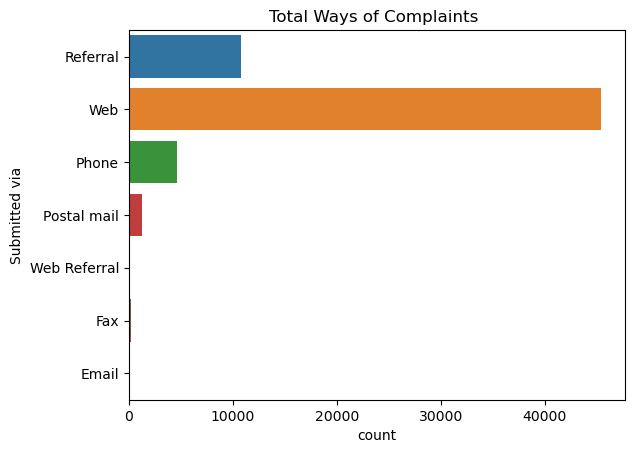

In [6]:
sns.countplot(y='Submitted via',data=df)
plt.title('Total Ways of Complaints ')

In [7]:
## Top 10 issues of CFPB
df['Issue'].value_counts().head(10)

Managing an account                                                                 15109
Incorrect information on your report                                                 4931
Problem with a purchase shown on your statement                                      4415
Closing an account                                                                   2953
Trouble during payment process                                                       2827
Opening an account                                                                   2725
Problem with a lender or other company charging your account                         2493
Fraud or scam                                                                        1987
Struggling to pay mortgage                                                           1904
Problem with a credit reporting company's investigation into an existing problem     1876
Name: Issue, dtype: int64

In [8]:
issue=df['Issue'].value_counts().head(10)

In [9]:
df['Company public response'].value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            60311
Company believes the complaint provided an opportunity to answer consumer's questions                                         12
Company believes the complaint is the result of a misunderstanding                                                             7
Company believes it acted appropriately as authorized by contract or law                                                       6
Company believes complaint caused principally by actions of third party outside the control or direction of the company        3
Company disputes the facts presented in the complaint                                                                          2
Name: Company public response, dtype: int64

In [10]:
## States with most complaints 
States_with_complaint=df['State'].value_counts()

In [11]:
print(States_with_complaint)

CA    13709
FL     6488
TX     4686
NY     4442
GA     2921
NJ     2664
IL     2270
MA     2141
MD     1959
VA     1731
NC     1717
PA     1676
WA     1530
AZ     1516
MI     1395
NV     1221
CT     1097
SC      822
TN      758
OH      731
MO      674
OR      620
CO      576
MN      382
DC      353
IN      316
KS      311
OK      293
WI      291
AL      269
DE      268
AR      266
RI      249
LA      246
NM      219
UT      201
NH      199
KY      157
IA      154
ME      152
MS      141
ID      122
HI      111
AK      110
NE       83
WV       77
MT       70
VT       54
SD       34
ND       22
WY       22
Name: State, dtype: int64


In [12]:
df['Product'].value_counts()

Checking or savings account                                                     24814
Credit card or prepaid card                                                     16197
Credit reporting, credit repair services, or other personal consumer reports     7710
Mortgage                                                                         6601
Money transfer, virtual currency, or money service                               3453
Debt collection                                                                  2736
Vehicle loan or lease                                                             633
Payday loan, title loan, or personal loan                                         333
Student loan                                                                       39
Name: Product, dtype: int64

<Axes: xlabel='count', ylabel='Product'>

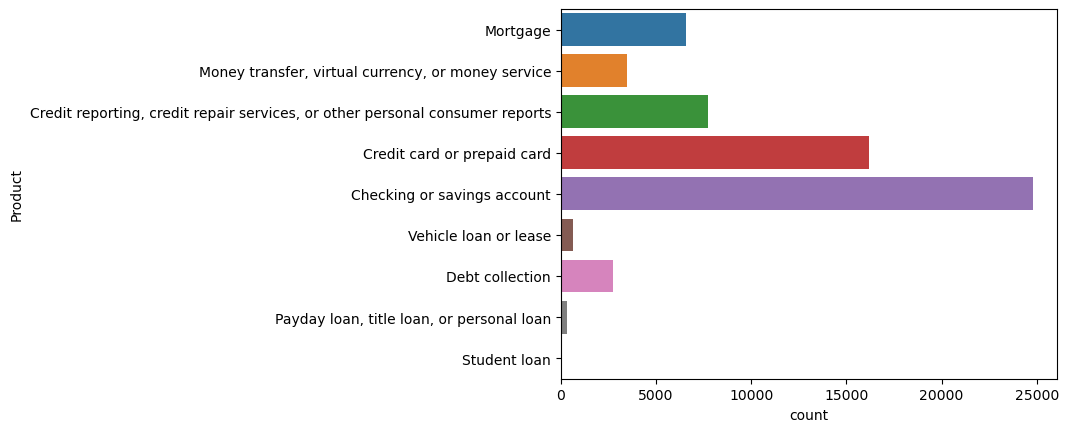

In [13]:
sns.countplot(y='Product',data=df)

In [14]:
df['Company response to consumer'].value_counts()

Closed with explanation            41044
Closed with monetary relief        14697
Closed with non-monetary relief     5273
In progress                         1494
Closed                                 8
Name: Company response to consumer, dtype: int64

Text(0.5, 1.0, 'Company Response to Consumer')

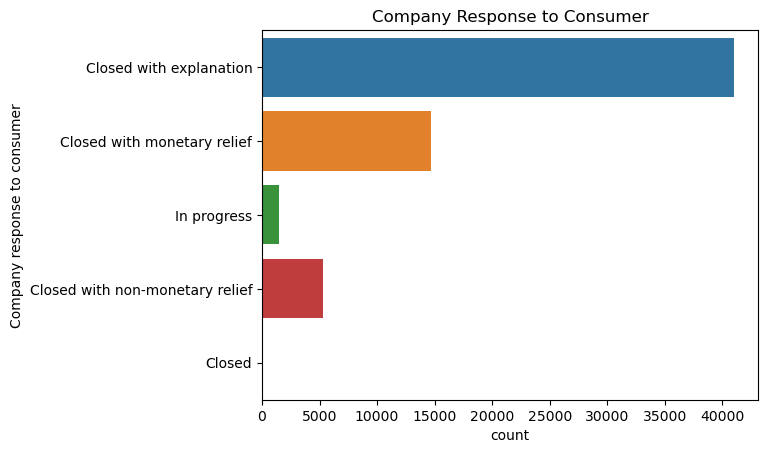

In [15]:
sns.countplot(y='Company response to consumer',data=df)
plt.title('Company Response to Consumer')

In [16]:
df['Timely response?'].value_counts()

Yes    58619
No      2403
Name: Timely response?, dtype: int64

<Axes: xlabel='Timely response?', ylabel='count'>

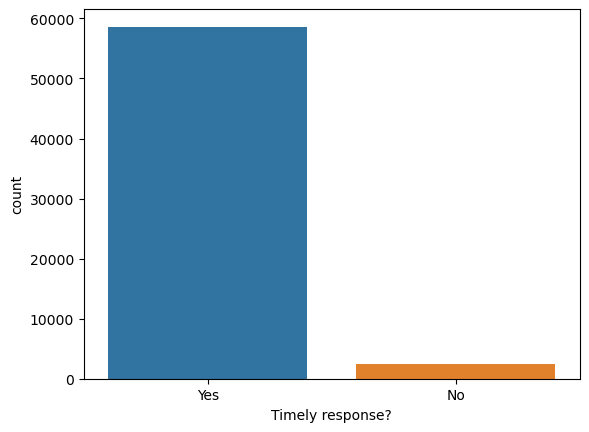

In [17]:
sns.countplot(x='Timely response?',data=df)

## Sentiment Analysis

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kishk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [20]:
# Run the polarity score on the entire dataset
'''
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
'''

"\nres = {}\nfor i, row in tqdm(df.iterrows(), total=len(df)):\n    text = row['Text']\n    myid = row['Id']\n    res[myid] = sia.polarity_scores(text)\n"

In [21]:
pip install pandas nltk textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from textblob import TextBlob

Negative    61022
Neutral      1494
Name: Sentiment, dtype: int64


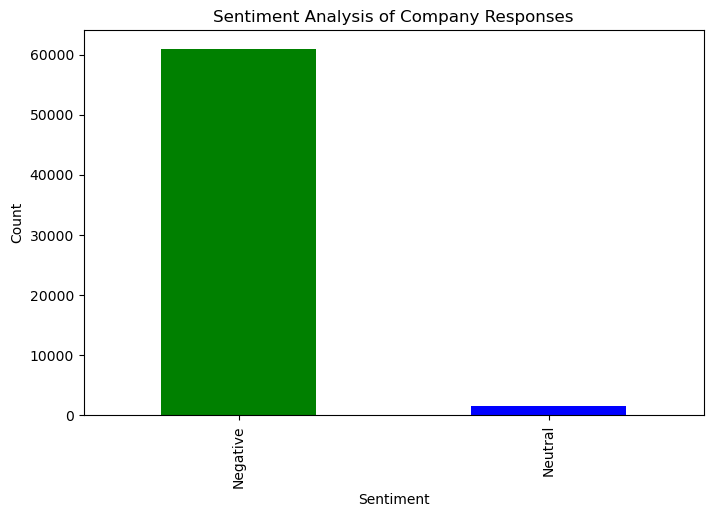

In [23]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
df['Sentiment'] = df['Company response to consumer'].apply(get_sentiment)

# Display the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Company Responses')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Neutral     51461
Negative    10188
Positive      867
Name: Sentiment, dtype: int64


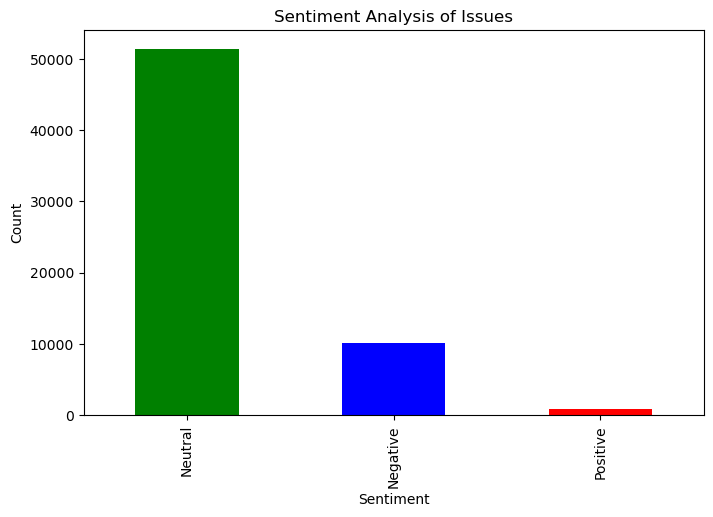

In [24]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
df['Sentiment'] = df['Issue'].apply(get_sentiment)

# Display the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Issues')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [25]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from wordcloud import WordCloud , STOPWORDS

In [27]:
df.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?,Sentiment
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes,Neutral
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,Neutral
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,Neutral
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN,Neutral
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,Neutral


In [28]:
'''total_comments_positive1 = ' '.join(df['Issue'])
total_comments_positive2 = ' '.join(df['Company response to consumer'])

#total_comments_positive3 = ' '.join(df['Company public response'])
'''

"total_comments_positive1 = ' '.join(df['Issue'])\ntotal_comments_positive2 = ' '.join(df['Company response to consumer'])\n\n#total_comments_positive3 = ' '.join(df['Company public response'])\n"

In [29]:
type(df['Company public response'])

pandas.core.series.Series

In [30]:
'''wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive1)'''

'wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive1)'

In [31]:
'''plt.imshow(wordcloud)
plt.axis('off')'''

"plt.imshow(wordcloud)\nplt.axis('off')"

In [32]:
'''wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive2)'''

'wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive2)'

In [33]:
'''plt.imshow(wordcloud)
plt.axis('off')'''

"plt.imshow(wordcloud)\nplt.axis('off')"

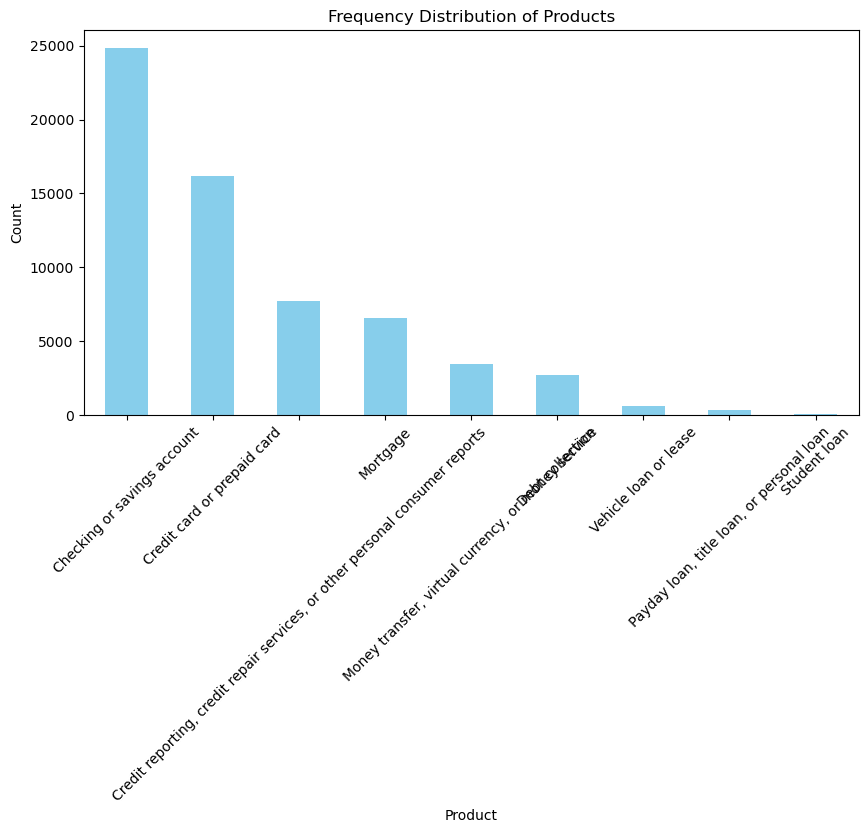

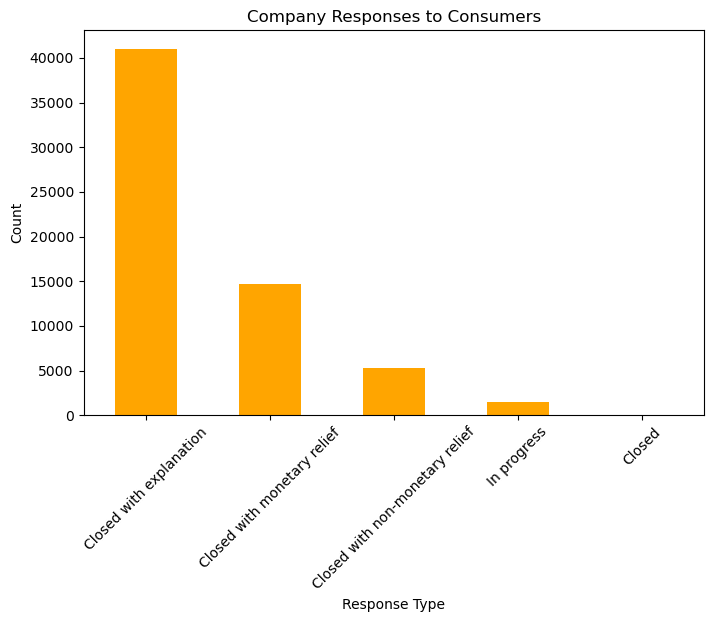

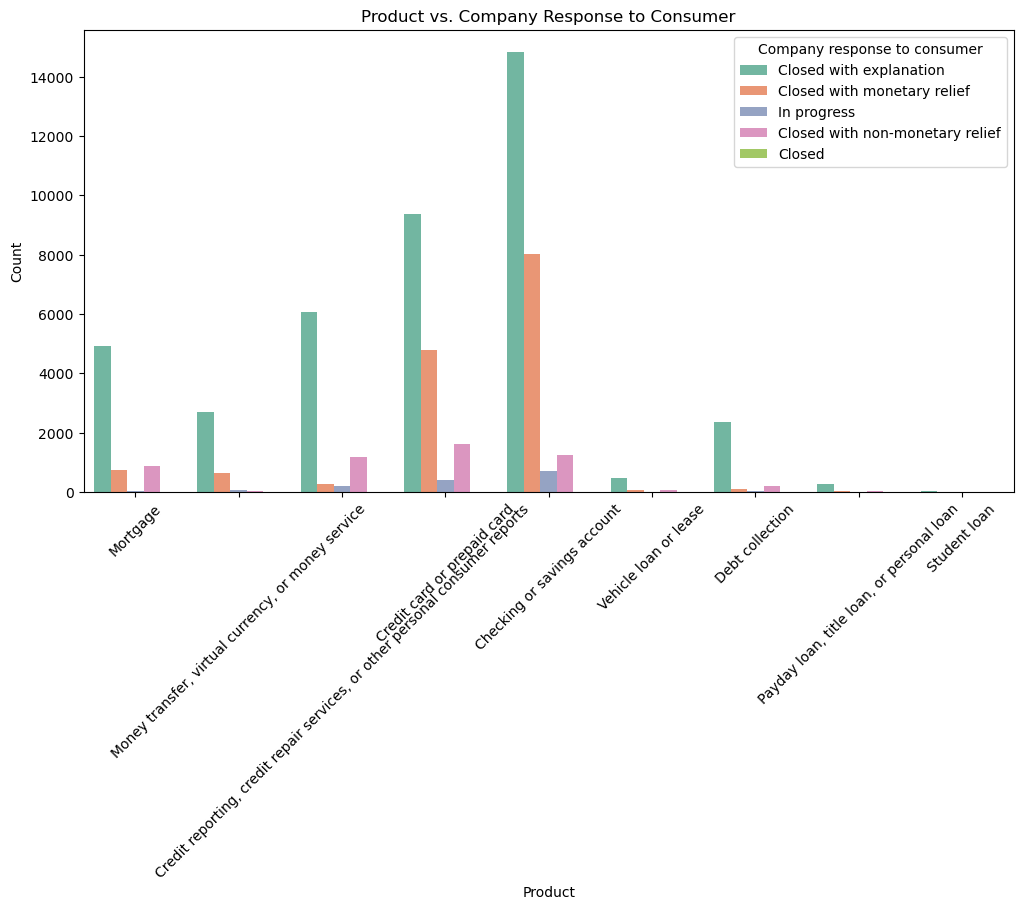

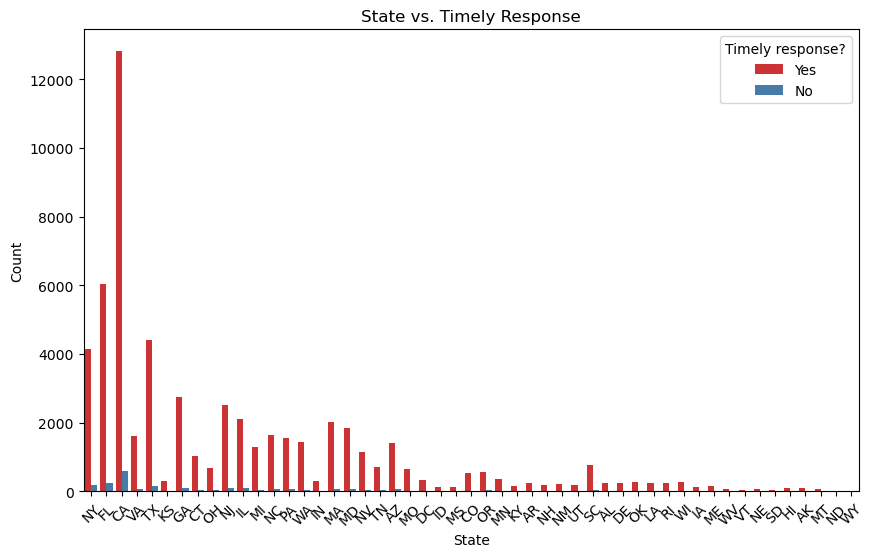

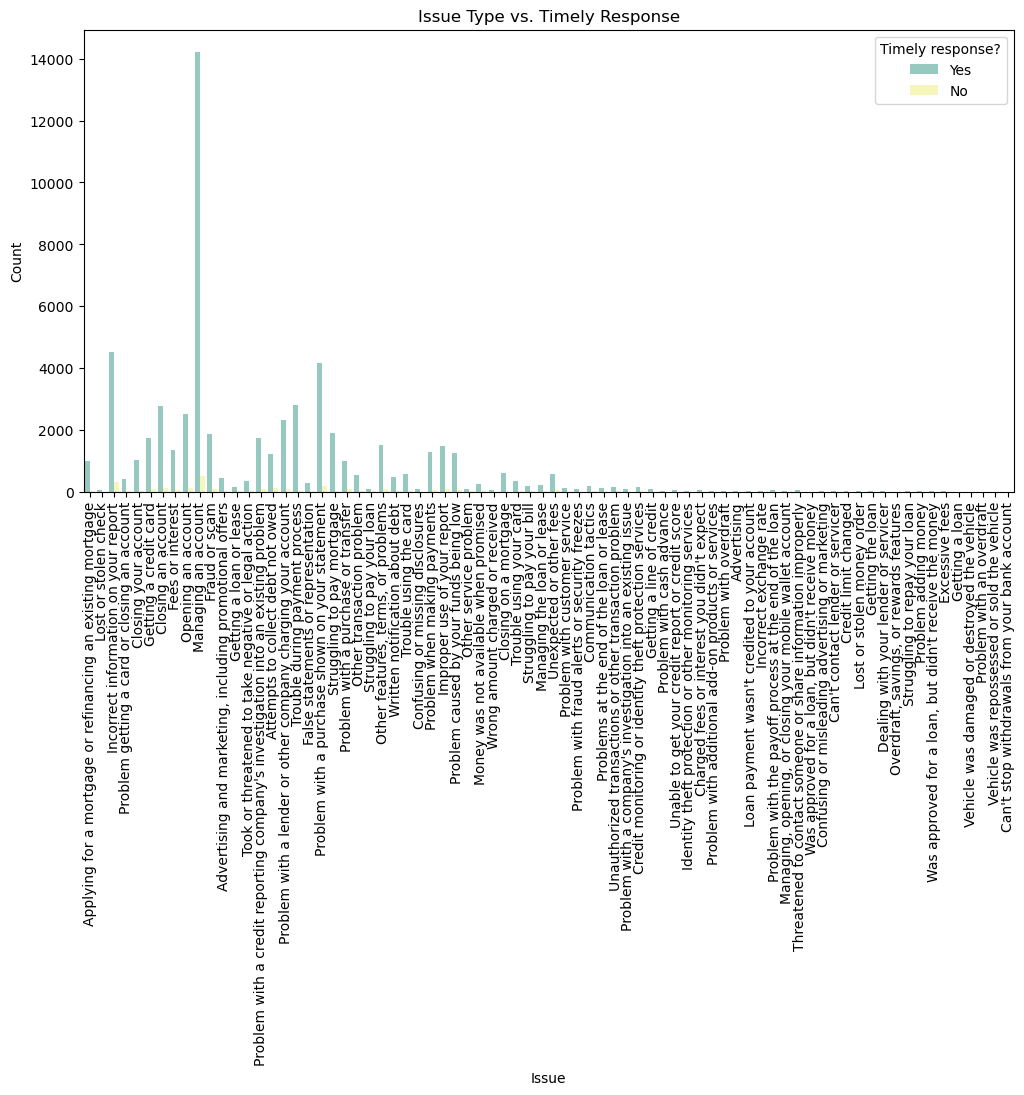

In [34]:


# Unilateral Analysis (Univariate)

# 1. Frequency count of Product
plt.figure(figsize=(10, 5))
df['Product'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Frequency count of Company Response to Consumer
plt.figure(figsize=(8, 5))
df['Company response to consumer'].value_counts().plot(kind='bar', color='orange')
plt.title('Company Responses to Consumers')
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bilateral Analysis (Bivariate)

# 1. Product vs Company Response
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product', hue='Company response to consumer', palette='Set2')
plt.title('Product vs. Company Response to Consumer')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

# 2. State vs Timely Response
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', hue='Timely response?', palette='Set1')
plt.title('State vs. Timely Response')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

# 3. Timely Response vs. Issue Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Issue', hue='Timely response?', palette='Set3')
plt.title('Issue Type vs. Timely Response')
plt.xticks(rotation=90)
plt.xlabel('Issue')
plt.ylabel('Count')
plt.show()


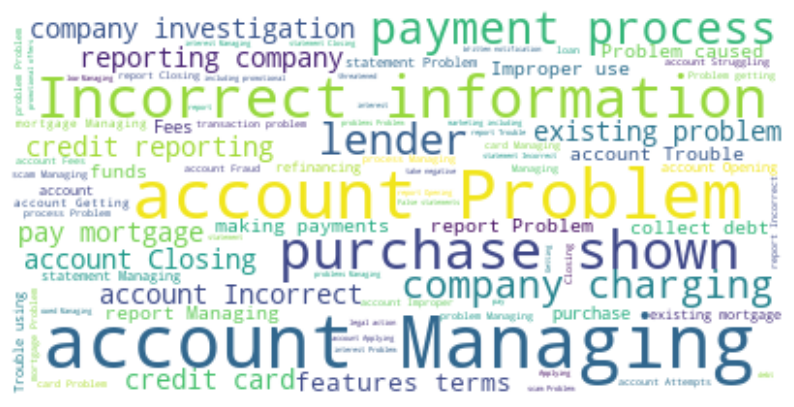

In [35]:




# Example: You can choose a column with text data, like 'Issue', or 'Company public response'
# For this example, let's create a word cloud from the 'Issue' column.
comments_positive = df['Issue'].dropna()  # Dropping NaN values in case there are any

# Combine all the text data into one large string
total_comments_positive = ' '.join(comments_positive)

# Generate the word cloud
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_positive)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


In [36]:


# Use 'Issue' column as an example, you can change this to another column with text
comments_positive = df['Issue'].dropna()

# Combine all the text data into one large string
total_comments_positive = ' '.join(comments_positive)

# Create a WordCloud object
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_positive)

# Get the word frequencies
word_frequencies = wordcloud.words_  # This returns a dictionary of word -> frequency

# Convert the dictionary to a DataFrame for easier manipulation and display
word_frequencies_df = pd.DataFrame(list(word_frequencies.items()), columns=['Word', 'Frequency'])

# Show the DataFrame
print(word_frequencies_df)


                      Word  Frequency
0         account Managing   1.000000
1          account Problem   0.854317
2    Incorrect information   0.792893
3           purchase shown   0.709921
4          payment process   0.454575
..                     ...        ...
195       interest Trouble   0.011738
196       problems Opening   0.011738
197                   line   0.011417
198           process Fees   0.011417
199       problems Getting   0.011256

[200 rows x 2 columns]


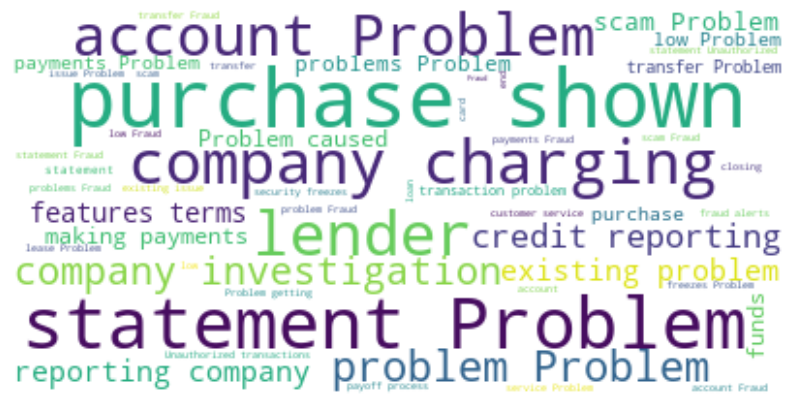

In [37]:


# Example: We will assume negative comments might have keywords like 'fraud', 'problem', 'issue', 'dispute', etc.
negative_keywords = ['problem', 'fraud', 'dispute', 'error', 'scam', 'complaint']

# Filter rows based on the presence of these negative keywords in the 'Issue' column
comments_negative = df[df['Issue'].str.contains('|'.join(negative_keywords), case=False, na=False)]['Issue'].dropna()

# Combine all the text data into one large string
total_comments_negative = ' '.join(comments_negative)

# Generate the word cloud
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_negative)

# Plotting the word cloud for negative comments
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


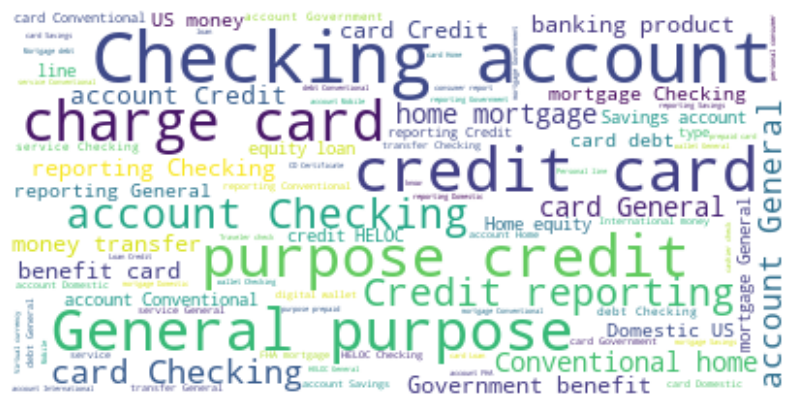

In [38]:
# Generate a word cloud from the 'Sub-product' column
comments_sub_product = df['Sub-product'].dropna()  # Dropping NaN values

# Combine all the text data into one large string
total_comments_sub_product = ' '.join(comments_sub_product)

# Generate the word cloud
wordcloud_sub_product = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_sub_product)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_sub_product, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


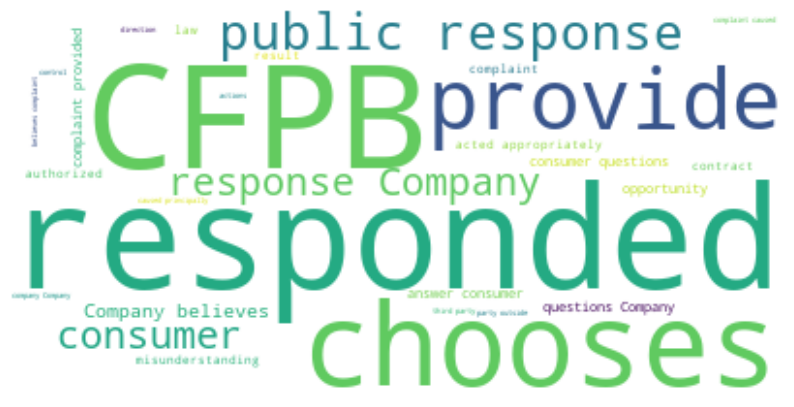

In [41]:
# Generate a word cloud from the 'Sub-product' column
comments_public_response = df['Company public response'].dropna()  # Dropping NaN values

# Combine all the text data into one large string
total_comments_public_response = ' '.join(comments_public_response)

# Generate the word cloud
wordcloud_public_reponse = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_public_response)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_public_reponse, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

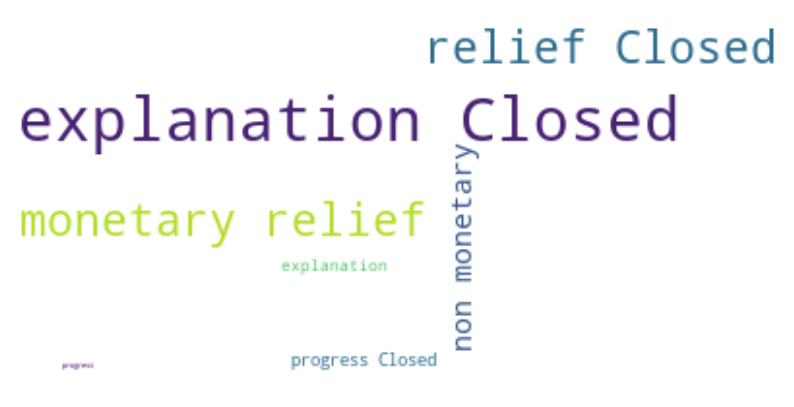

In [43]:
# Generate a word cloud from the 'Sub-product' column
comments_company_response = df['Company response to consumer'].dropna()  # Dropping NaN values

# Combine all the text data into one large string
total_comments_company_response_consumer = ' '.join(comments_company_response)

# Generate the word cloud
wordcloud_company_reponse_consumer = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_company_response_consumer)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_company_reponse_consumer, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
'''

Extra



from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'Issue': ["Great experience with mortgage application", 
              "Very frustrating mortgage refinancing process", 
              "Smooth mortgage approval", 
              "Mortgage process was confusing and slow"],
    'Sentiment': ["Positive", "Negative", "Positive", "Negative"]
}

df = pd.DataFrame(data)

# Separate text based on sentiment
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Issue'])
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Issue'])

# Generate the word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Display the word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()
'''